# Learning logistic regression for classification of Iris dataset

We exercised a linear regression for diabetes dataset. In this exercise, we will do a classification task, classifying three different types of irises. Description about the dataset is on https://en.wikipedia.org/wiki/Iris_flower_data_set and http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html.

Let's import necessary libraries at first, and look the dataset.
The example code about this exercise is introduced on http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

iris = datasets.load_iris()

In [5]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [7]:
iris.data.shape

(150, 4)

In [6]:
iris.target.shape

(150,)

As shown above, total number of samples is 150. A feature set of the dataset is composed of ['sepal length(cm)', 'sepal width(cm)', 'petal length(cm)', 'petal width(cm)'], and classes of the samples are ['setosa', 'versicolor', 'virginica'].

In the tutorial, it only use the first two features, i.e. 'sepal length(cm)' and 'sepal width(cm)'.

In [11]:
X = iris.data[:, :2]
X.shape

(150, 2)

In [13]:
Y = iris.target
Y.shape

(150,)

We should classify the samples with respect to the first two features.
For classification, we will use a logistic regression model which is already implemented in the scikit-learn library(http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

The parameter 'C' at below means 'inverse of regularization strength'. We will learn further about the regularization later.

In [15]:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X,Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

We complete to get a model which classifies the samples by the logistic regression.
To visualize our model, we have to get grid mesh points that range from minimum to maximum values of each feature.

In [17]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
x_min, x_max

(3.7999999999999998, 8.4000000000000004)

In [18]:
y_min, y_max

(1.5, 4.9000000000000004)

We can check thaat min and max values of each feature are (3.8, 8.4) and (1.5, 4.9).
We will generate the two-dimensional mesh space with a grid spacing, h=0.02.

In [20]:
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx, yy

(array([[ 3.8 ,  3.82,  3.84, ...,  8.36,  8.38,  8.4 ],
        [ 3.8 ,  3.82,  3.84, ...,  8.36,  8.38,  8.4 ],
        [ 3.8 ,  3.82,  3.84, ...,  8.36,  8.38,  8.4 ],
        ..., 
        [ 3.8 ,  3.82,  3.84, ...,  8.36,  8.38,  8.4 ],
        [ 3.8 ,  3.82,  3.84, ...,  8.36,  8.38,  8.4 ],
        [ 3.8 ,  3.82,  3.84, ...,  8.36,  8.38,  8.4 ]]),
 array([[ 1.5 ,  1.5 ,  1.5 , ...,  1.5 ,  1.5 ,  1.5 ],
        [ 1.52,  1.52,  1.52, ...,  1.52,  1.52,  1.52],
        [ 1.54,  1.54,  1.54, ...,  1.54,  1.54,  1.54],
        ..., 
        [ 4.86,  4.86,  4.86, ...,  4.86,  4.86,  4.86],
        [ 4.88,  4.88,  4.88, ...,  4.88,  4.88,  4.88],
        [ 4.9 ,  4.9 ,  4.9 , ...,  4.9 ,  4.9 ,  4.9 ]]))

Reshape the numpy arrays with keyword ravel(), https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html.

In [25]:
xx.ravel(), yy.ravel()

(array([ 3.8 ,  3.82,  3.84, ...,  8.36,  8.38,  8.4 ]),
 array([ 1.5,  1.5,  1.5, ...,  4.9,  4.9,  4.9]))

In [23]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 3.8 ,  1.5 ],
       [ 3.82,  1.5 ],
       [ 3.84,  1.5 ],
       ..., 
       [ 8.36,  4.9 ],
       [ 8.38,  4.9 ],
       [ 8.4 ,  4.9 ]])

Finally, we can get the class for each grid point by prediction from the trained logistic model.

In [28]:
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([1, 1, 1, ..., 2, 2, 2])

In [30]:
Z.shape

(39501,)

In [32]:
Z = Z.reshape(xx.shape)
Z.shape

(171, 231)

Plot both the used data samples as point, which corresponds to the plt.scatter() as below, and colormesh, plt.pcolormesh(~~~).

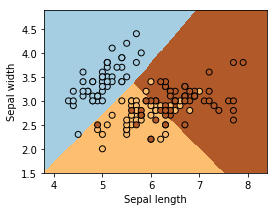

In [45]:
plt.figure(figsize=(4,3))
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

In summary, we can easily get the logistic regression model which classifies the iris samples based on the features - shape descriptors. 

I hope that students will be able to construct models for molecular applications, for example, prediction models for classification of chemical whether toxic or not. For those applications, we should think about which descriptors could describe molecules suitably. Traditionally, molecular fingerprint is used to describe a molecular structure in computational manner. 
We will learn such descriptors and feature learning approaches based on raw molecular structure input, which is central part of deep learning, later.